<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


21.2

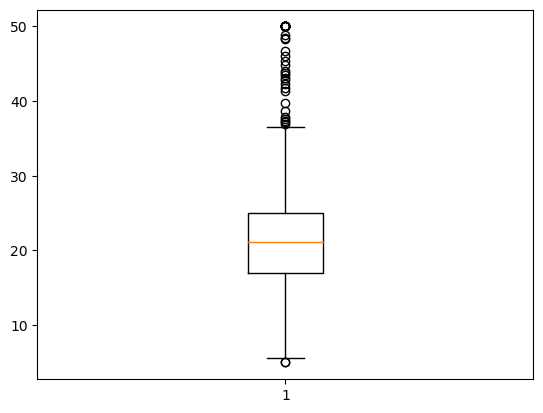

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot
#MEDV - Median value of owner-occupied homes in $1000's

fig, ax = pyplot.subplots()
ax.boxplot(boston_df.MEDV)

boston_df.MEDV.median()


([<matplotlib.axis.XTick at 0xa58ac48>, <matplotlib.axis.XTick at 0xa58ab28>],
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

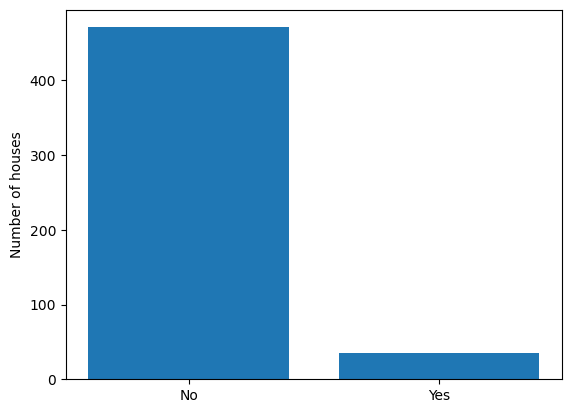

In [6]:
#Provide a  bar plot for the Charles river variable
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
data_CHAS = boston_df.CHAS.value_counts()
pyplot.bar(data_CHAS.index,data_CHAS.values)
pyplot.ylabel("Number of houses")
pyplot.xticks([0,1],['No','Yes'])

<ipython-input-8-4576fb8afd16>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


{'whiskers': [<matplotlib.lines.Line2D at 0xaae8518>,
 'caps': [<matplotlib.lines.Line2D at 0x9fc1a10>,
 'boxes': [<matplotlib.lines.Line2D at 0xaa9d468>,
 'medians': [<matplotlib.lines.Line2D at 0xaa81de8>,
 'fliers': [<matplotlib.lines.Line2D at 0xa843f08>,
 'means': []}

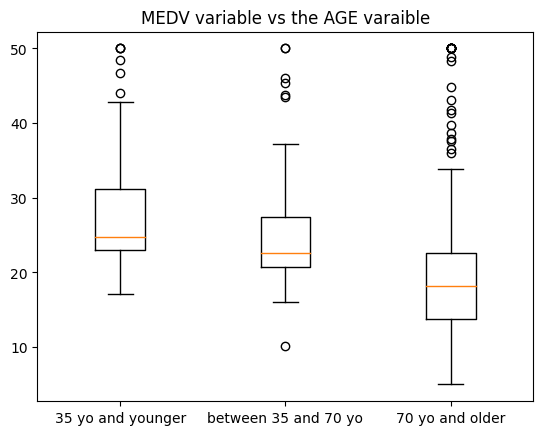

In [8]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
data_medv_age_discrete = [boston_df.loc[boston_df['AGE'] <= 35, 'MEDV'],
                          boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'MEDV'],
                          boston_df.loc[boston_df['AGE'] >= 70, 'MEDV']]
labels = ['35 yo and younger', 'between 35 and 70 yo', '70 yo and older'] 
fig, ax = pyplot.subplots()
ax.set_title('MEDV variable vs the AGE varaible')
ax.set_xticklabels(labels)
ax.boxplot(data_medv_age_discrete)


Text(0, 0.5, 'Non-retail business acres per town')

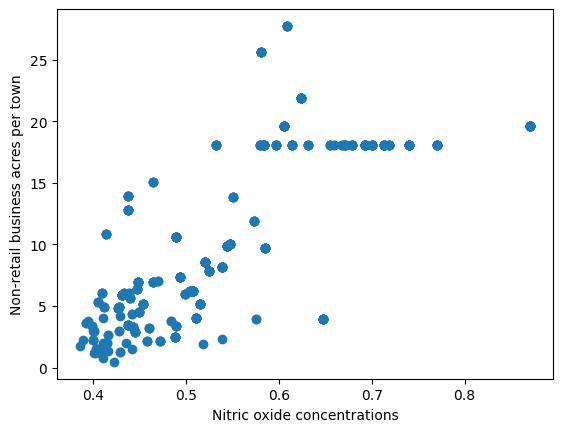

In [9]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#and the proportion of non-retail business acres per town. What can you say about the relationship?

pyplot.scatter(boston_df.NOX,boston_df.INDUS)
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Non-retail business acres per town')

#There is a positive correlation between both variables

Text(0.5, 0, 'Pupil to teacher ratio')

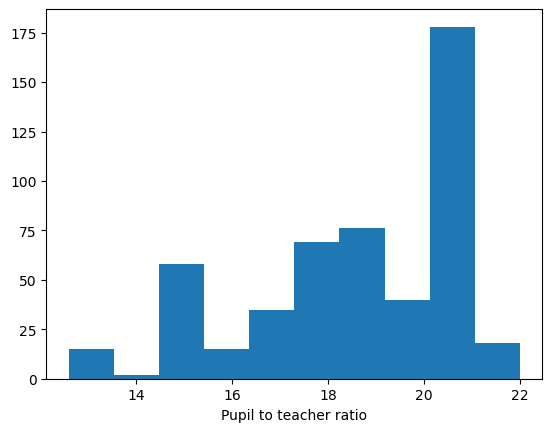

In [10]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df.PTRATIO)
pyplot.xlabel('Pupil to teacher ratio')

In [15]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

#First we need to check is we can assume or not that the variances are equal (Levene Test)
scipy.stats.levene(boston_df.loc[boston_df['CHAS'] == 0, 'MEDV'],
                   boston_df.loc[boston_df['CHAS'] == 1, 'MEDV'],
                   center = 'mean')
#LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
#p-value is very small, so we will assume that the variances are different 

scipy.stats.ttest_ind(boston_df.loc[boston_df['CHAS'] == 0, 'MEDV'],
                   boston_df.loc[boston_df['CHAS'] == 1, 'MEDV'],
                   equal_var = False)
#TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)
#p-value is very small, so there is a significant difference in median value of houses bound by the Charles river or not

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of
#owner occupied units built prior to 1940 (AGE)? (ANOVA)

#First we need to check is we can assume or not that the variances are equal (Levene Test)
scipy.stats.levene(data_medv_age_discrete[0],
                   data_medv_age_discrete[1],
                   data_medv_age_discrete[2],
                   center = 'mean')
#LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)
#The p-value is higher than 0.05, so we can assume that the variances are equal

scipy.stats.f_oneway(data_medv_age_discrete[0],data_medv_age_discrete[1],data_medv_age_discrete[2])
#F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
#The p-value is almost zero, so we have strong significant evidence that at least one of the medians is different

In [18]:
#Can we conclude that there is no relationship between Nitric oxide concentrations
#and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df.NOX,boston_df.INDUS)
#PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
#the p-value is, in practice, zero, so we can conclude that there is a relationship between NOS and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [21]:
#What is the impact of an additional weighted distance to the five Boston employment centres 
#on the median value of owner occupied homes? (Regression analysis)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(boston_df['DIS'].values.reshape(-1,1),boston_df['MEDV'])
res.coef_
#array([1.09161302])
#The slope of the linear regression is 1.0916, i.e., for each unit increase in the addition weighted distance, the median
#value of owner occupied homes increases by 1.0916

array([1.09161302])